In [ ]:
# Demo:  gaussian mixture model for one-dimensional data;
# find maximum-likelihood parameters by writing a loss function
# and optimizing it.
# Examine simple 1d classifier for this 1d dataset.

In [2]:
# Here I load in a much-loved dataset from 1888, Francis Galton's heights of 900
# adults and their parents.

galton = pd.read_csv("../data/galton.csv")
galton.head()
y = galton.childHeight.values

Text(0, 0.5, 'Number')

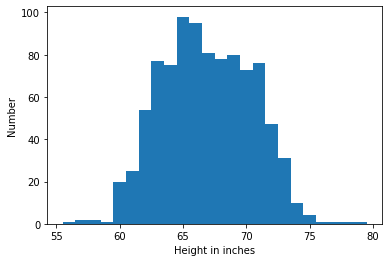

In [3]:
plt.hist(galton.childHeight, bins=np.arange(55, 80) + .5) 
plt.xlabel("Height in inches")
plt.ylabel("Number")

To make sure I can use optimization, let's try a test.

$$ LOSS_{SSE}(\theta; y)  = \sum (y-\theta)^2 $$

$$ \hat{\theta} = argmin_{\theta} \ \  LOSS_{SSE} (\theta; y) $$

If I wanted to replace all my y with a constant,
what number gives me the smallest summed error?



In [5]:
# Here I define an extremely simple function.
# This function sums the squared-differences between
# each value in y and the paramter theta.
def LOSS_SSE( theta):
    assert len(theta) == 1
    return np.sum( (y - theta)**2 ) 

In [7]:
thetahat = minimize(LOSS_SSE, 0)
thetahat

      fun: 11952.69953961456
 hess_inv: array([[0.00052716]])
      jac: array([0.00012207])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 106
      nit: 4
     njev: 47
   status: 2
  success: False
        x: array([66.74593149])

Declare victory, the value 66.75 inches minimizes the sum-squared differences from all 946 data points.

In [8]:
y.mean()

66.74593147751605

In [9]:
# A slightly more elaborate model: normal 
def LOSS_NORMAL(parameter):
    return np.sum( -scipy.stats.norm.logpdf( y, loc=parameter[0], scale=parameter[1])  )  

In [10]:
LOSS_NORMAL([66.7,3.5])

2516.314916873552

In [11]:
# Does it look like it has a minimum ? 
LOSS_NORMAL([86.7,3.5]), LOSS_NORMAL([66.7,3.5]), LOSS_NORMAL([46.7,3.5])

(17695.25369238376, 2516.314916873552, 17835.335325036813)

In [14]:
# Run library optimization funciton
minimize(LOSS_NORMAL, [66, 3.5], method="BFGS")

      fun: 2515.781800385769
 hess_inv: array([[0.07772882, 0.04119342],
       [0.04119342, 0.02304153]])
      jac: array([0., 0.])
  message: 'Optimization terminated successfully.'
     nfev: 39
      nit: 10
     njev: 13
   status: 0
  success: True
        x: array([66.7459315 ,  3.57733453])

Declare victory, now we have a mean and standard deviation that maximize the likelihood
of the data given a normal distribution with location, scale parameters 66.745 and 3.577.

Wait just one minute.

In [15]:
y.mean(), y.std()

(66.74593147751605, 3.5773346010057634)

In [12]:
# Hmm. Right.  I have used a machine gun to shoot a squirrel.

# The sample standard deviation and the sample mean are the maximum-likelihood
# estimators for the normal likelihood.

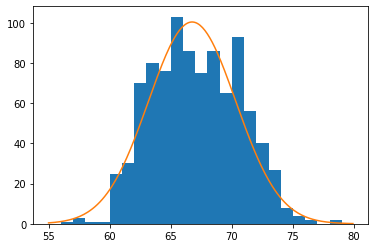

In [16]:
# Plot the Normal distribution fit and the data histogram:
x = np.arange(55,80,.1)
yhat_g = scipy.stats.norm.pdf(x, loc=66.7459, scale=3.577)
plt.hist(y, bins=np.arange(55, 80))
plt.plot(x,yhat_g *900)

Note here that "Loss functions"  are things to be minimized, and "likelihood functions" are things to be maximized.
If you ever see your fit running away to -infinity, try multiplying it by -1 and see if you got the 
sign wrong for max/minimization.

To get some insight into this likelihood function, 
$$ \textrm{norm.logpdf}(x, mu, sigma) = c -  \log \sigma - {(x - \mu)^2 \over 2 \sigma^2} $$
Let's evaluate it on a 2d grid in $\mu$ and $\sigma$ and make contour plots:


In [17]:
# This is going to evaluate our LOSS_NORMAL function on a grid
xgrid = np.arange(55,80,2) 
ygrid = np.arange(0.5, 20.0, 0.5)
xax, yax = np.meshgrid(xgrid, ygrid, indexing="ij")
z = np.zeros(xax.shape)
print(xax.shape, yax.shape, z.shape)
for i in range(len(xgrid)):
    for j in range(len(ygrid)):
        z[i,j]= LOSS_NORMAL((xgrid[i], ygrid[j]))


(13, 39) (13, 39) (13, 39)


In [ ]:
# Arright, I can't find how to plot the axes right without plt.contour and plt.contourf

Text(0, 0.5, 'posterior std')

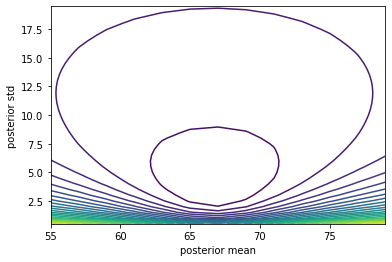

In [18]:
plt.contour(xax, yax, np.log(z), levels=30)
plt.xlabel("posterior mean")
plt.ylabel("posterior std")

In [ ]:
# It has an optimum.  (This is good.)

You didn't really need a loss function to find mean and standard deviation of a
collection of points.  But now that we have the machinery for optimization, we can
find the optimum of more complex likelihood functions:

Now consider this model:

$$ P(x, \mu_1, \sigma_1, \mu_2, \sigma_2) = {1\over 2} \mathcal{N} (x; \mu_1, \sigma_1) + 
{1\over 2} \mathcal{N} (x; \mu_2, \sigma_2)  $$

This is a mixture of two Gaussian distributions.

In [19]:
# So we construct the sum over all the data points of the log of two normal pdfs:

def LOSS_NORMAL2(parameter2):
    '''Sums likelihoods over y (assumed already defined) 
    for sum-of-two-equally-weighted-normal-distributions
    with paramters mu_1, sigma_1, mu_2, and sigma_2.'''
    assert len(parameter2) ==4  # throw an error if parameter2 has the wrong type
    return np.sum( -np.log(
                           scipy.stats.norm.pdf( y, loc=parameter2[0], scale=parameter2[1]) +
                           scipy.stats.norm.pdf( y, loc=parameter2[2], scale=parameter2[3]) ))  

In [20]:
LOSS_NORMAL2([60,3.5,70,3.5])
    

2189.586119511434

In [21]:
# Just to convince myself the sign is right..  change mu1 to waay too small and waay too large,
# confirm there is a minimum:
LOSS_NORMAL2([0,3.5,70,3.5]), LOSS_NORMAL2([60,3.5,70,3.5]), LOSS_NORMAL2([120,3.5,70,3.5])


(2919.91165156743, 2189.586119511434, 2919.91165156743)

In [22]:
minimize(LOSS_NORMAL2, [63, 2, 70, 2], method="BFGS")

      fun: 1851.8674514407735
 hess_inv: array([[ 0.00783133,  0.01133038, -0.00259784,  0.0187608 ],
       [ 0.01133038,  0.02768016, -0.00456697,  0.0397389 ],
       [-0.00259784, -0.00456697,  0.00387407, -0.01253936],
       [ 0.0187608 ,  0.0397389 , -0.01253936,  0.07293249]])
      jac: array([ 0.00000000e+00, -1.52587891e-05,  1.52587891e-05,  0.00000000e+00])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 105
      nit: 15
     njev: 21
   status: 2
  success: False
        x: array([64.08472207,  2.2771205 , 69.42351661,  2.48216295])

In [23]:
# And now evaluate this on a grid of len(xgrid2)x len(ygrid2) to make a contour plot
xgrid2 = np.arange(55,80,2) 
ygrid2 = np.arange(55,80,2)
xax2, yax2 = np.meshgrid(xgrid2, ygrid2, indexing="ij")
z2 = np.zeros(xax2.shape)
print(xax2.shape, yax2.shape, z.shape)
for i in range(len(xgrid2)):
    for j in range(len(ygrid2)):
        z2[i,j]= LOSS_NORMAL2((xgrid2[i],2.27,  ygrid2[j], 2.48))


(13, 13) (13, 13) (13, 39)


array([[55, 57, 59, 61, 63, 65, 67, 69, 71, 73, 75, 77, 79],
       [55, 57, 59, 61, 63, 65, 67, 69, 71, 73, 75, 77, 79],
       [55, 57, 59, 61, 63, 65, 67, 69, 71, 73, 75, 77, 79],
       [55, 57, 59, 61, 63, 65, 67, 69, 71, 73, 75, 77, 79],
       [55, 57, 59, 61, 63, 65, 67, 69, 71, 73, 75, 77, 79],
       [55, 57, 59, 61, 63, 65, 67, 69, 71, 73, 75, 77, 79],
       [55, 57, 59, 61, 63, 65, 67, 69, 71, 73, 75, 77, 79],
       [55, 57, 59, 61, 63, 65, 67, 69, 71, 73, 75, 77, 79],
       [55, 57, 59, 61, 63, 65, 67, 69, 71, 73, 75, 77, 79],
       [55, 57, 59, 61, 63, 65, 67, 69, 71, 73, 75, 77, 79],
       [55, 57, 59, 61, 63, 65, 67, 69, 71, 73, 75, 77, 79],
       [55, 57, 59, 61, 63, 65, 67, 69, 71, 73, 75, 77, 79],
       [55, 57, 59, 61, 63, 65, 67, 69, 71, 73, 75, 77, 79]])

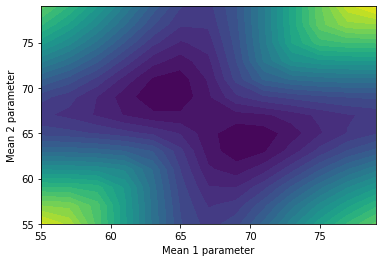

In [24]:
plt.contourf(xax2, yax2, np.log(z2), levels=30)
plt.xlabel("Mean 1 parameter")
plt.ylabel("Mean 2 parameter")
yax2

In [ ]:
# This is, believe it or not, reassuring.  There are two equal 
# optima, one with mean1 = 69 and mean2 = 64, and one with 
# mean1 = 64 and mean2 = 69; these correspond to switching the 
# labels between the large and the small groups.

Some questions for thought:  

* The optimizer claimed victory after only 105 evaluations of the loss function.  How many times did I evaluate the loss function to make these contour maps?

* The parameter space for my function was (mean1, std1, mean2, std2), that's four dimensions.
I plotted a two-dimensional slice, with std1 and std2 held fixed at their optmimum values.
Do you think std1 and std1 might be correlated with mean1 and mean2?

* There were two paramters (sigma_1 and sigma_2) that were .. "similar."   mean_1 and mean_2 were similar, but it was clear they would chase down different parts of the distribution.  But what does it mean if sigma_1 and sigma_2 are very different?   What would happen to the fitting process if I set sigma_2 = sigma_1 ? 

* There was one paramter that I failed to parameterize: the mixing coefficient.  In constructing the loss function I implicitly made the weights for normal 1 and normal 2 equal.    Would I get a better or worse fit if I let the algorithm fit the probability ratio between class 1 and class 2?



In [25]:
# One more contour plotl this one looking at mean_1 and sigma_1 while
# the values of mean_2 and sigma_2 are kept fixed.
xgrid3 = np.arange(55,80,1) 
ygrid3 = np.arange(0.5,20,0.25)
xax3, yax3 = np.meshgrid(xgrid3, ygrid3, indexing="ij")
z3 = np.zeros(xax3.shape)
print(xax3.shape, yax3.shape, z.shape)
for i in range(len(xgrid3)):
    for j in range(len(ygrid3)):
        z3[i,j]= LOSS_NORMAL2((xgrid3[i],ygrid3[j] , 69.42351661 , 2.48))

(25, 78) (25, 78) (13, 39)


array([[55, 57, 59, 61, 63, 65, 67, 69, 71, 73, 75, 77, 79],
       [55, 57, 59, 61, 63, 65, 67, 69, 71, 73, 75, 77, 79],
       [55, 57, 59, 61, 63, 65, 67, 69, 71, 73, 75, 77, 79],
       [55, 57, 59, 61, 63, 65, 67, 69, 71, 73, 75, 77, 79],
       [55, 57, 59, 61, 63, 65, 67, 69, 71, 73, 75, 77, 79],
       [55, 57, 59, 61, 63, 65, 67, 69, 71, 73, 75, 77, 79],
       [55, 57, 59, 61, 63, 65, 67, 69, 71, 73, 75, 77, 79],
       [55, 57, 59, 61, 63, 65, 67, 69, 71, 73, 75, 77, 79],
       [55, 57, 59, 61, 63, 65, 67, 69, 71, 73, 75, 77, 79],
       [55, 57, 59, 61, 63, 65, 67, 69, 71, 73, 75, 77, 79],
       [55, 57, 59, 61, 63, 65, 67, 69, 71, 73, 75, 77, 79],
       [55, 57, 59, 61, 63, 65, 67, 69, 71, 73, 75, 77, 79],
       [55, 57, 59, 61, 63, 65, 67, 69, 71, 73, 75, 77, 79]])

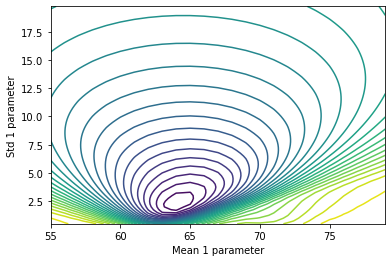

In [26]:
plt.contour(xax3, yax3, np.log(z3), levels=30)
plt.xlabel("Mean 1 parameter")
plt.ylabel("Std 1 parameter")
plt.savefig("2d-mu-sigma.png", dpi=300, bbox_inches="tight")
yax2

In [ ]:
# In this part of the likelihood function, there is a bit of 
# correlation between mu1 and sigma1. 
# Correlations are typical...
# But these have the effect that optimization of one axis at a time
# can be difficult, because the best fit in one direction spoil
# the fit in other directions.

In [ ]:
# Warning:  this is a 2d-plane slice through a 4-dimensional likelihood 
# function, holding mu_2 and sigma_2 constant.  In general, the optimium
# for mu_1 and sigma_1 is going to depend on these, so if I wanted to
# see the "real" joint distribution of mu_1 and sigma_1 I would need
# to find the optimium at each point or marginalize (by numerical 
# integration) to replace mu_2 and sigma_2 with probaiblity-density-informed
# expecatation values.

# This is going to require a (numerical or monte-carlo) integration 
# over the variables that are not of interest (jargon: nuisance variables)


$$ P_{marginal}(x) = \int dy {P_{posterior}(x|y) P_{prior}(y) }$$

In [27]:
# The two-paramter fit results were
thetahat = [64.08472207,  2.2771205 , 69.42351661,  2.48216295]
# and that was for the function 
yhat = 0.5 * scipy.stats.norm.pdf(x, loc=thetahat[0], scale=thetahat[1]) + 0.5 * scipy.stats.norm.pdf(x, loc=thetahat[2], scale=thetahat[3])

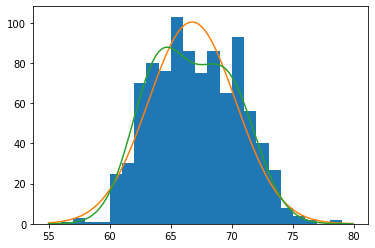

In [28]:
x = np.arange(55,80,.1)
yhat_g = scipy.stats.norm.pdf(x, loc=66.7459, scale=3.577)
plt.hist(y,  bins=np.arange(55, 80))
plt.plot(x,yhat_g *900)
plt.plot(x, yhat*900)

In [ ]:
# So why does the data look like this?  
# Sexual dimorphism.

In [ ]:
galton.head(1)

In [29]:
# Create a column whose value is 1 if gender is male, 0 otherwise: 
galton["indicator"] =  galton.gender == "male"

Text(0.5, 0, 'Child height (in)')

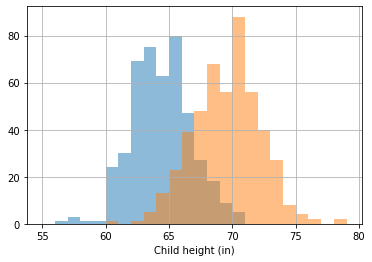

In [30]:
galton.groupby(by="indicator").childHeight.hist(alpha=0.5, bins=np.arange(55, 80))
plt.xlabel("Child height (in)")

In [32]:
# We can get the per-category mean and standard devation

# This goes by the jargon "Class-conditional distribution"
# which is to say, "All the data in class 1"

galton.groupby(by="indicator").childHeight.describe()

,count,mean,std,min,25%,50%,75%,max
indicator,,,,,,,,
False,453.0,64.103974,2.355653,56.0,62.5,64.0,65.5,70.5
True,481.0,69.234096,2.623905,60.0,67.5,69.2,71.0,79.0


In [33]:
# And can write down theoretical densities for normal distributions
# with the empirical mean and standard devation for the two classes:
density1 = scipy.stats.norm.pdf(x, loc=64.103974, scale=2.355653)
density2 = scipy.stats.norm.pdf(x, loc=69.234096, scale=2.623905)

indicator
False    AxesSubplot(0.547727,0.125;0.352273x0.755)
True     AxesSubplot(0.547727,0.125;0.352273x0.755)
Name: childHeight, dtype: object

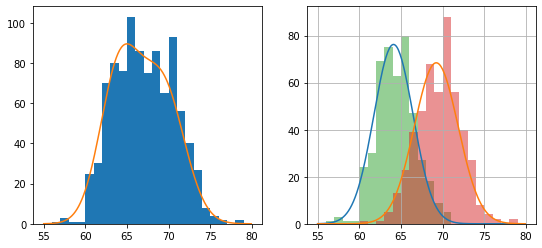

In [34]:
plt.figure(figsize=(9,4))
plt.subplot(121)
plt.hist(y,  bins=np.arange(55, 80))
plt.plot(x, np.array([(density1+density2)*450 ]).T ) 
plt.subplot(122)
plt.plot(x, np.array([density1*450, density2*450 ]).T ) 
galton.groupby(by="indicator").childHeight.hist(alpha=0.5, bins=np.arange(55, 80))


In [35]:
# The best decision I can make is to pick the most likely class for each 
# value of x
x[np.min(np.where(density1<density2))]

66.70000000000016

In [36]:
# And if I classify everyone shorter than 67.7 as female, 
# this is how my predictions compare to the original labels:
galton["classification"] = galton.childHeight > 67.7 
galton.groupby(["classification", "indicator"]).indicator.count()

classification  indicator
False           False        421
                True         129
True            False         32
                True         352
Name: indicator, dtype: int64

In [37]:

#  Correct: 773    Incorrect:  161 
#  Errors incorrectly classified as M : 32
#         incorrectly classified as F: 129 

len(galton), galton.indicator.sum(), galton.indicator.sum()/len(galton)

(934, 481, 0.5149892933618844)

In [ ]:
# overall accuracy, adjusted for nothing:
773/934

Bayes' rule for inferring probability of class $\mathcal{C}_k $  ($k$ is the index that counts $r$ classes) given data $x$: 

$$ P(\mathcal{C}_k | x) \propto {P(x| \mathcal{C}_k) P(\mathcal{C}_k)}  $$

And the probability that $x$ came from class  $\mathcal{C}_1 $ is

$$ P(\mathcal{C}_1 | x) = {P(x| \mathcal{C}_1) P(\mathcal{C}_1) \over 
\displaystyle\sum_{i=1}^r P(x| \mathcal{C}_i) P(\mathcal{C}_i) }  $$


Text(0.5, 0, 'child Height (in)')

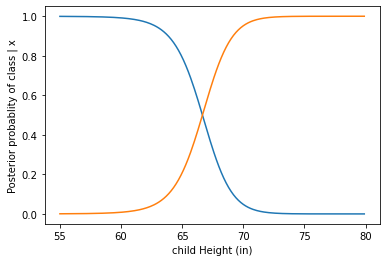

In [38]:
# If I want a graph of my model's posterior probability of being
# in class 1 or class 2 as a function of x: 

p_class1 = density1 /(density1 + density2)
p_class2 = density2 /(density1 + density2)

plt.plot(x,p_class1)
plt.plot(x,p_class2) 
plt.ylabel("Posterior probablity of class | x")
plt.xlabel("child Height (in)")

Text(0.5, 0, 'Child height (in)')

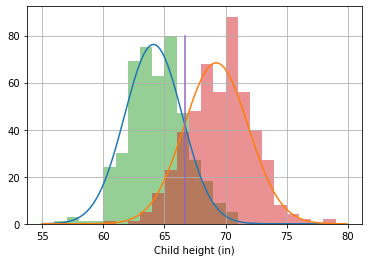

In [39]:
plt.plot(x, np.array([density1*450, density2*450 ]).T ) 
galton.groupby(by="indicator").childHeight.hist(alpha=0.5, bins=np.arange(55, 80))
plt.plot([66.7,66.7], [0,80])
plt.xlabel("Child height (in)")